<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/MTCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'MTCH'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,31.500000,32.650002,31.500000,32.380001,30.818012,2402700
1,2018-01-03,32.970001,33.080002,31.677999,32.009998,30.465858,2038500
2,2018-01-04,32.340000,32.492001,31.520000,32.130001,30.580072,1325300
3,2018-01-05,32.150002,32.160000,31.650000,31.799999,30.265989,1020900
4,2018-01-08,31.799999,32.189999,31.540001,32.090000,30.542002,696700


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,89.594263,91.342188,87.821391,89.608853,89.122419,2.523177e+06
std,42.242472,42.875939,41.446499,42.134143,42.659443,2.467892e+06
min,31.360001,31.620001,30.846001,31.400000,29.885286,4.964000e+05
25%,53.365000,54.680000,52.047501,53.475000,52.475000,1.461300e+06
50%,76.260002,77.639999,75.089996,76.019997,76.019997,2.019700e+06
75%,133.980003,137.445000,131.952499,134.264999,134.264999,2.789950e+06
max,172.429993,182.000000,168.490005,175.529999,175.529999,5.437480e+07


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

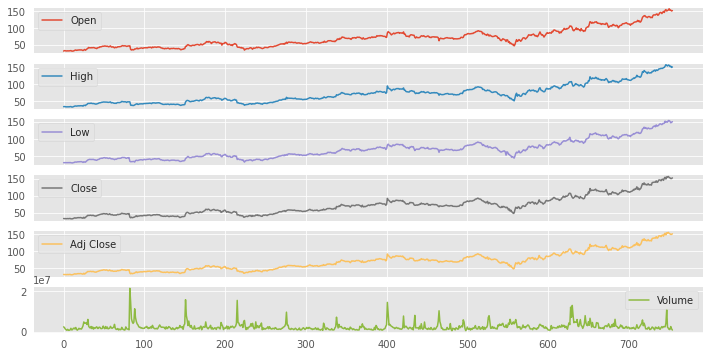

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


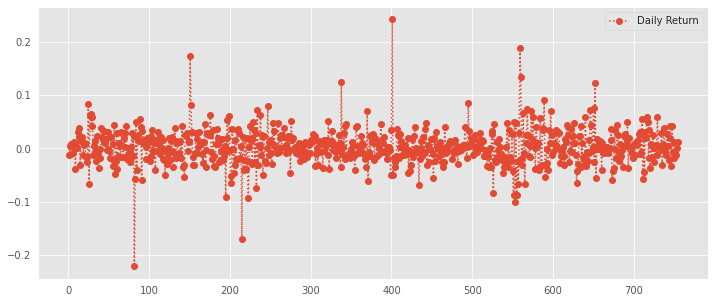

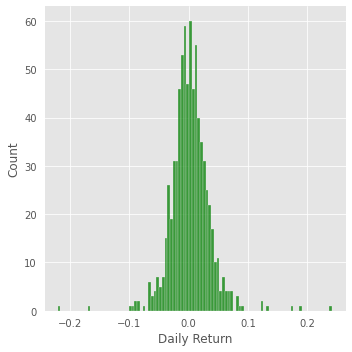

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02   31.500000   32.650002   31.500000   32.380001   30.818012   
1    2018-01-03   32.970001   33.080002   31.677999   32.009998   30.465858   
2    2018-01-04   32.340000   32.492001   31.520000   32.130001   30.580072   
3    2018-01-05   32.150002   32.160000   31.650000   31.799999   30.265989   
4    2018-01-08   31.799999   32.189999   31.540001   32.090000   30.542002   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  157.570007  157.570007  153.160004  153.389999  153.389999   
751  2020-12-24  153.039993  154.149994  151.339996  152.080002  152.080002   
752  2020-12-28  153.639999  154.744995  146.809998  150.080002  150.080002   
753  2020-12-29  151.000000  151.199997  148.240005  150.220001  150.220001   
754  2020-12-30  152.199997  152.660004  150.300003  152.000000  152.000000   

      Volume  MA for 10 days  MA for 50 days  MA fo

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

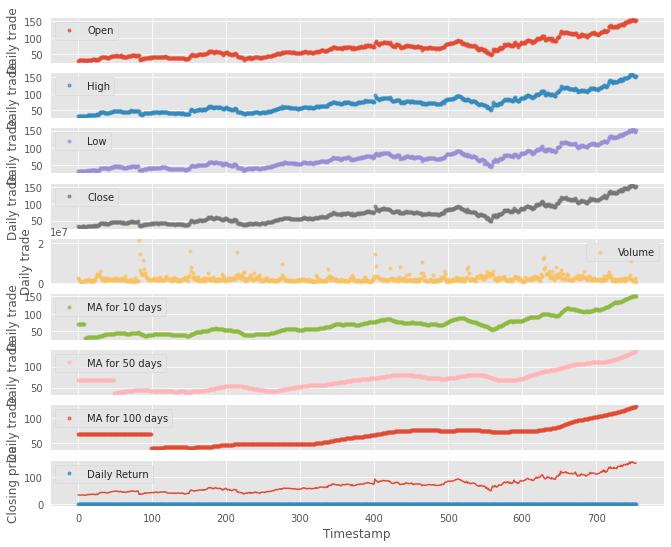

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

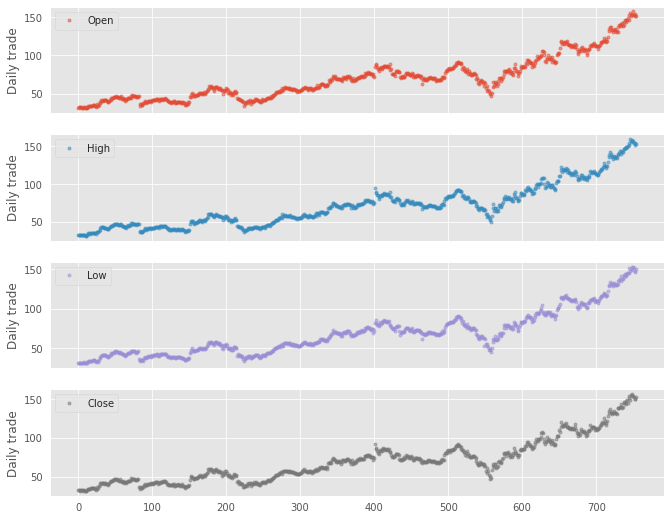

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02   31.500000   32.650002   31.500000   32.380001   30.818012   
1    2018-01-03   32.970001   33.080002   31.677999   32.009998   30.465858   
2    2018-01-04   32.340000   32.492001   31.520000   32.130001   30.580072   
3    2018-01-05   32.150002   32.160000   31.650000   31.799999   30.265989   
4    2018-01-08   31.799999   32.189999   31.540001   32.090000   30.542002   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  157.570007  157.570007  153.160004  153.389999  153.389999   
751  2020-12-24  153.039993  154.149994  151.339996  152.080002  152.080002   
752  2020-12-28  153.639999  154.744995  146.809998  150.080002  150.080002   
753  2020-12-29  151.000000  151.199997  148.240005  150.220001  150.220001   
754  2020-12-30  152.199997  152.660004  150.300003  152.000000  152.000000   

      Volume  MA for 10 days  MA for 50 days  MA fo

,count,mean,std,min,25%,50%,75%,max
Open,755.0,6.985102e+01,2.796188e+01,31.360001,4.626000e+01,6.794000e+01,8.355500e+01,1.575700e+02
High,755.0,7.132789e+01,2.845880e+01,31.620001,4.720000e+01,6.890000e+01,8.487000e+01,1.595300e+02
Low,755.0,6.846152e+01,2.746689e+01,30.846001,4.548000e+01,6.657000e+01,8.228000e+01,1.532900e+02
Close,755.0,6.993615e+01,2.794175e+01,31.400000,4.647000e+01,6.798000e+01,8.397000e+01,1.561200e+02
Adj Close,755.0,6.928736e+01,2.853952e+01,29.885286,4.445674e+01,6.798000e+01,8.397000e+01,1.561200e+02
Volume,755.0,2.410108e+06,1.895261e+06,496400.000000,1.406450e+06,1.921300e+06,2.683500e+06,2.151540e+07
MA for 10 days,755.0,6.966846e+01,2.691018e+01,31.969000,4.600350e+01,6.902300e+01,8.234700e+01,1.525760e+02
MA for 50 days,755.0,6.860022e+01,2.283666e+01,37.212500,4.831040e+01,6.860022e+01,7.900610e+01,1.369944e+02
MA for 100 days,755.0,6.763859e+01,1.941652e+01,39.958250,4.812235e+01,6.763859e+01,7.584395e+01,1.239931e+02
Daily Return,755.0,2.596171e-03,3.305842e-02,-0.220925,-1.432313e-02,2.003986e-03,1.931065e-02,2.416451e-01


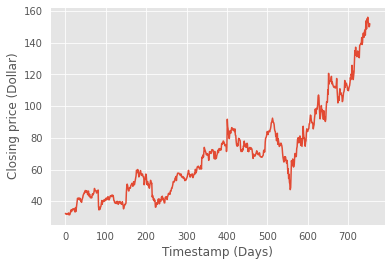

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 13s 187ms/step - loss: 0.0673 - mse: 0.0673 - mae: 0.1898 - val_loss: 0.0297 - val_mse: 0.0297 - val_mae: 0.1416
Epoch 2/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0339 - mse: 0.0339 - mae: 0.1450 - val_loss: 0.0226 - val_mse: 0.0226 - val_mae: 0.1144
Epoch 3/40
14/14 [==============================] - 1s 43ms/step - loss: 0.0222 - mse: 0.0222 - mae: 0.1155 - val_loss: 0.0258 - val_mse: 0.0258 - val_mae: 0.1186
Epoch 4/40
14/14 [==============================] - 1s 44ms/step - loss: 0.0199 - mse: 0.0199 - mae: 0.1110 - val_loss: 0.0158 - val_mse: 0.0158 - val_mae: 0.0970
Epoch 5/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0181 - mse: 0.0181 - mae: 0.1052 - val_loss: 0.0153 - val_mse: 0.0153 - val_mae: 0.0999
Epoch 6/40
14/14 [==============================] - 1s 39ms/step - loss: 0.0151 - mse: 0.0151 - mae: 0.0967 - val_loss: 0.0125 - val_mse: 0.0125 - val_mae: 0.0868
Epoch 7/40
14/14 [==

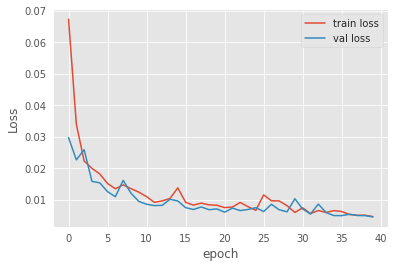

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

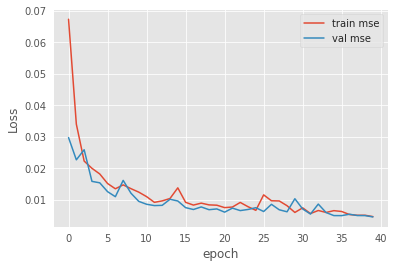

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

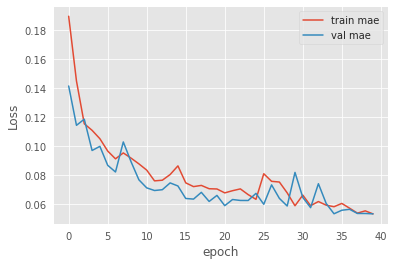

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 8ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0533


[0.004485266748815775, 0.004485266748815775, 0.05325094982981682]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.903936
R2 Score: 0.903936
Max Error: 0.243290


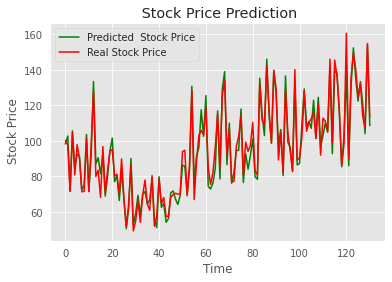

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 9ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0845


[0.011090744286775589, 0.011090744286775589, 0.08449070900678635]

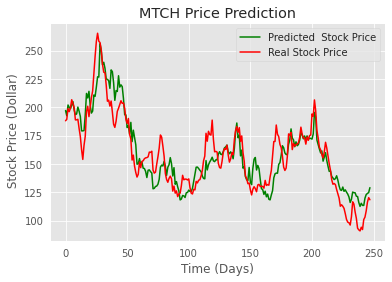

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()